In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all the CSV files
numbers_df = pd.read_csv('numbers.csv', delimiter=';')
percentages_df = pd.read_csv('precentages.csv', delimiter=';')
death_rates_df = pd.read_csv('death_rates.csv', delimiter=';')

# Clean up the columns by removing leading/trailing spaces
numbers_df.columns = numbers_df.columns.str.strip()
percentages_df.columns = percentages_df.columns.str.strip()
death_rates_df.columns = death_rates_df.columns.str.strip()

# Drop empty rows at the end of each DataFrame
numbers_df.dropna(how='all', inplace=True)
percentages_df.dropna(how='all', inplace=True)
death_rates_df.dropna(how='all', inplace=True)




In [2]:
# Calculate means for each age group excluding the "All" row for age-specific groups
age_groups = numbers_df.columns[1:-1]  # Exclude "Year" and "All" from age groups for averaging

mean_numbers = numbers_df[age_groups].mean()
mean_percentages = percentages_df[age_groups].mean()
mean_death_rates = death_rates_df[age_groups].mean()

# Now we will use the exact column name after verifying it
# For numbers_df and percentages_df, the column is '[All]', for death_rates_df it's 'All'
all_mean_number = numbers_df['[All]'].mean()
all_mean_percentage = percentages_df['[All]'].mean()
all_mean_death_rate = death_rates_df['All'].mean()

# Combine these into a single DataFrame, ensuring 'All' is calculated properly
summary_df = pd.DataFrame({
    'Age Group': list(age_groups) + ['All'],
    'Mean Number of Deaths': list(mean_numbers) + [all_mean_number],
    'Mean Percentage of Road Traffic Deaths (%)': list(mean_percentages) + [all_mean_percentage],
    'Mean Death Rate per 100,000 Population': list(mean_death_rates) + [all_mean_death_rate]
})

# Display the summary table
print(summary_df)

TypeError: can only concatenate str (not "int") to str

NameError: name 'summary_df' is not defined

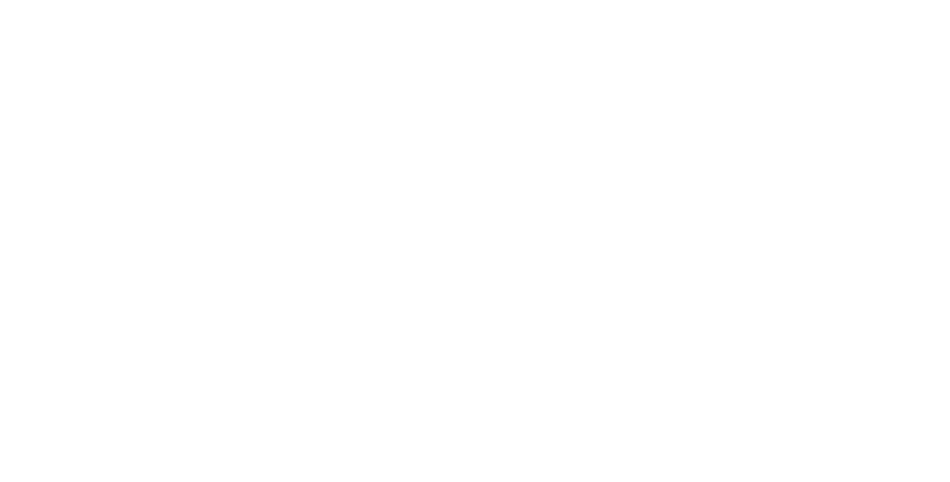

In [3]:
# Optional: Visualize the summary table using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Hide axes
ax.axis('off')

# Create a table plot
table = ax.table(cellText=summary_df.values, 
                 colLabels=summary_df.columns, 
                 cellLoc='center', 
                 loc='center',
                 colColours=['lightblue'] * len(summary_df.columns))

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary_df.columns))))

# Add title
plt.title('Summary of Road Traffic Deaths Metrics by Age Group', fontsize=14, pad=20)

# Save the table if needed
plt.savefig('summary_table_metrics.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()